# Estatística no futebol

### A duração de um técnico, no futebol, influencia na posição final do campeonato?



#### Descrição do problema

Uma posição _volátil_, no futebol (tanto no Brasil quanto fora), é a posição de técnico. Uma prática comum é substituir o treinador após alguns resultados negativos. Naturalmente, um time que não troca o técnico não é garantia de sucesso no campeonato. Assim, surge a dúvida: será que, **em geral**, times com técnicos mais longevos ficam em uma posição melhor na tabela, no fim do campeonato?

#### Dados

Para _atacar_ esse problema, será disponibilizado um arquivo json com todos os dados do Campeonato Brasileiro de 2019. Para ler um arquivo json, basta importar o módulo 'pandas' com o comando:  ```import pandas as pd```. Para ler um arquivo json, utilize o método:  
```dados = pd.read_json('nome_do_arquivo.json') ```

Para acessar os valores, basta olhar os nomes presentes nas linhas e colunas. Por exemplo: dados[2][1]. Vale lembrar que os 'índices' podem ser strings também.

#### Resultado esperado

Ao fim do projeto, deverá ter os dados da posição final do time e do tempo (em número de rodadas) que o técnico mais longevo ficou. Por exemplo, o técnico do 1º colocado ficou 32 rodadas, do 2º ficou 37, do 3º 29, assim por diante. Essas dados podem ser armazenados em uma estrutura de dados de sua escolha 

Com esses dados, fazer um gráfico simples (x é a posição final e y o tempo do técnico mais longevo).

#### Observação: Trabalho em grupo de, no mínimo, 5 pessoas e máximo, 8 pessoas.

# Resolução do projeto

**Abordagem**: Para este projeto, utilizamos a programação funcional para realizar o tratamento de dados e gerar novos dados.

## Primeiros passos

Primeiramente, definimos uma célula para importar as bibliotecas necessárias para realização do projeto. Sobre os usos de cada uma delas, temos que:

- `pandas` será utilizada somente para leitura dos dados de um arquivo JSON e na visualização de dados em forma de tabelas (dataframes).
- `matplotlib` será utilizada para gerar um ou mais gráficos simples, tal como descrito no enunciado.
- `pprint` será utilizada para imprimir os dicionários na tela com melhor legibilidade.
- `functools` será utilizada para realizar cálculos durante a classificação do time, especificamente no critério de desempate denominado confronto direto.
- `random` será utilizada para realizar cálculos durante a classificação do time, especificamente no critério de desempate denominado sorteio.

In [99]:
import pandas as pd
import matplotlib.pyplot as plt
from pprint import pprint
from functools import reduce
from random import random

Em seguida, realizamos a leitura dos dados do arquivo JSON utilizando `pandas` e armazenamos estes dados em uma estrutura de matriz utilizando *list comprehension*.

In [100]:
campeonato = pd.read_json('brasileirao-2019.json')
campeonato = [[campeonato[coluna][linha] for linha in campeonato.index] for coluna in campeonato.columns]

Antes de criar as funções necessárias para o projeto, verificamos a estrutura geral dos dados a partir de um dataframe, e a estrutura de um elemento da matriz `dados`.

In [101]:
df_campeonato = pd.DataFrame.from_records(dados)
df_campeonato

,0,1,2,3,4,5,6,7,8,9
0,"{'clubs': {'home': 'São Paulo', 'away': 'Botaf...","{'clubs': {'home': 'Atlético-MG', 'away': 'Ava...","{'clubs': {'home': 'Chapecoense', 'away': 'Int...","{'clubs': {'home': 'Flamengo', 'away': 'Cruzei...","{'clubs': {'home': 'Grêmio', 'away': 'Santos'}...","{'clubs': {'home': 'Bahia', 'away': 'Corinthia...","{'clubs': {'home': 'Athletico-PR', 'away': 'Va...","{'clubs': {'home': 'Ceará SC', 'away': 'CSA'},...","{'clubs': {'home': 'Palmeiras', 'away': 'Forta...","{'clubs': {'home': 'Fluminense', 'away': 'Goiá..."
1,"{'clubs': {'home': 'Internacional', 'away': 'F...","{'clubs': {'home': 'CSA', 'away': 'Palmeiras'}...","{'clubs': {'home': 'Corinthians', 'away': 'Cha...","{'clubs': {'home': 'Cruzeiro', 'away': 'Ceará ...","{'clubs': {'home': 'Avaí', 'away': 'Grêmio'}, ...","{'clubs': {'home': 'Goiás', 'away': 'São Paulo...","{'clubs': {'home': 'Vasco da Gama', 'away': 'A...","{'clubs': {'home': 'Fortaleza', 'away': 'Athle...","{'clubs': {'home': 'Santos', 'away': 'Fluminen...","{'clubs': {'home': 'Botafogo', 'away': 'Bahia'..."
2,"{'clubs': {'home': 'Vasco da Gama', 'away': 'C...","{'clubs': {'home': 'Palmeiras', 'away': 'Inter...","{'clubs': {'home': 'Ceará SC', 'away': 'Atléti...","{'clubs': {'home': 'Chapecoense', 'away': 'Ath...","{'clubs': {'home': 'São Paulo', 'away': 'Flame...","{'clubs': {'home': 'Botafogo', 'away': 'Fortal...","{'clubs': {'home': 'CSA', 'away': 'Santos'}, '...","{'clubs': {'home': 'Cruzeiro', 'away': 'Goiás'...","{'clubs': {'home': 'Grêmio', 'away': 'Fluminen...","{'clubs': {'home': 'Bahia', 'away': 'Avaí'}, '..."
3,"{'clubs': {'home': 'Fluminense', 'away': 'Bota...","{'clubs': {'home': 'Corinthians', 'away': 'Grê...","{'clubs': {'home': 'Goiás', 'away': 'Ceará SC'...","{'clubs': {'home': 'Flamengo', 'away': 'Chapec...","{'clubs': {'home': 'Santos', 'away': 'Vasco da...","{'clubs': {'home': 'Atlético-MG', 'away': 'Pal...","{'clubs': {'home': 'Internacional', 'away': 'C...","{'clubs': {'home': 'Avaí', 'away': 'CSA'}, 'go...","{'clubs': {'home': 'Athletico-PR', 'away': 'Ba...","{'clubs': {'home': 'Fortaleza', 'away': 'São P..."
4,"{'clubs': {'home': 'Fluminense', 'away': 'Cruz...","{'clubs': {'home': 'Palmeiras', 'away': 'Santo...","{'clubs': {'home': 'Atlético-MG', 'away': 'Fla...","{'clubs': {'home': 'São Paulo', 'away': 'Bahia...","{'clubs': {'home': 'Internacional', 'away': 'C...","{'clubs': {'home': 'Athletico-PR', 'away': 'Co...","{'clubs': {'home': 'Goiás', 'away': 'Botafogo'...","{'clubs': {'home': 'Chapecoense', 'away': 'For...","{'clubs': {'home': 'Vasco da Gama', 'away': 'A...","{'clubs': {'home': 'Ceará SC', 'away': 'Grêmio..."
5,"{'clubs': {'home': 'Botafogo', 'away': 'Palmei...","{'clubs': {'home': 'Grêmio', 'away': 'Atlético...","{'clubs': {'home': 'Flamengo', 'away': 'Athlet...","{'clubs': {'home': 'Santos', 'away': 'Internac...","{'clubs': {'home': 'Fortaleza', 'away': 'Vasco...","{'clubs': {'home': 'Cruzeiro', 'away': 'Chapec...","{'clubs': {'home': 'Bahia', 'away': 'Fluminens...","{'clubs': {'home': 'Corinthians', 'away': 'São...","{'clubs': {'home': 'CSA', 'away': 'Goiás'}, 'g...","{'clubs': {'home': 'Avaí', 'away': 'Ceará SC'}..."
6,"{'clubs': {'home': 'Flamengo', 'away': 'Fortal...","{'clubs': {'home': 'Bahia', 'away': 'Grêmio'},...","{'clubs': {'home': 'Botafogo', 'away': 'Vasco ...","{'clubs': {'home': 'Ceará SC', 'away': 'Santos...","{'clubs': {'home': 'Athletico-PR', 'away': 'Fl...","{'clubs': {'home': 'São Paulo', 'away': 'Cruze...","{'clubs': {'home': 'Atlético-MG', 'away': 'CSA...","{'clubs': {'home': 'Chapecoense', 'away': 'Pal...","{'clubs': {'home': 'Internacional', 'away': 'A...","{'clubs': {'home': 'Corinthians', 'away': 'Goi..."
7,"{'clubs': {'home': 'Vasco da Gama', 'away': 'I...","{'clubs': {'home': 'Palmeiras', 'away': 'Athle...","{'clubs': {'home': 'Grêmio', 'away': 'Fortalez...","{'clubs': {'home': 'Cruzeiro', 'away': 'Corint...","{'clubs': {'home': 'Ceará SC', 'away': 'Bahia'...","{'clubs': {'home': 'Avaí', 'away': 'São Paulo'...","{'clubs': 

In [102]:
pprint(dados[0][0], sort_dicts=False)

{'clubs': {'home': 'São Paulo', 'away': 'Botafogo'},
 'goals': {'home': '2', 'away': '0'},
 'cards': {'home': {'yellow': [], 'red': []},
           'away': {'yellow': [{'time': "90+4'",
                                'player': 'Joel Carli',
                                'position': 'Zagueiro',
                                'number': '3'},
                               {'time': "23'",
                                'player': 'Rodrigo Pimpão',
                                'position': 'Meio-campo',
                                'number': '9'},
                               {'time': "13'",
                                'player': 'João Paulo',
                                'position': 'Meio-campo',
                                'number': '10'},
                               {'time': "9'",
                                'player': 'Jonathan Silva Vieira',
                                'position': 'Zagueiro',
                                'number': '6'}],
             

## Variáveis globais

In [143]:
placar = [3, 0], [1, 1], [0, 3] # vitória, empate, derrota

## Definindo as funções

1. Função para extrair os dados necessários da matriz (somente aqueles que serão utilizados pela outra função).

In [301]:
def extracao_dados(mat: list, *dados_da_partida: str) -> tuple:
    """
    Extrai apenas os dados informados de uma matriz normalizada para campeonatos.
    Retorna uma tupla, sendo cada elemento desta uma tupla contendo os dados de todos os jogos referentes aos argumentos passados.

    Parâmetros:
    ------

        `mat`: posicional, recebe uma matriz.
        `dados_da_partida`: recebe as informações que serão extraídos. 

    Dados que podem ser extraídos:
    ------

        `clubs`: nome dos times que se enfrentaram.
        `goals`: placar do jogo.
        `cards`: quantidade de cartões no jogo.
        `hour`: horário do jogo.
        `date`: data do jogo.
        `coach`: técnico dos times.
        `formation`: táticas utilizada no jogo.
        `goalsPlayer`: nomes dos jogadores que marcam gols.
        `stadium`: estádio onde foi realizada a partida.
        `stats`: estatísticas da partida. Aqui temos informações sobre a quantidade de chutes, chutes a gol, posse de bola, passes, precisão de passe, faltas, cartões amarelos, cartões vermelhos, impedimentos e escanteios.
    """
    
    conjunto_de_dados = []

    for dado in dados_da_partida:
        dados = []
        
        for linha in mat:
            for partida in linha:
                dados.append(partida[dado])
                
        conjunto_de_dados.append(tuple(dados))
        
    return tuple(conjunto_de_dados)

In [307]:
pprint(extracao_dados(campeonato, "date", "hour", "stadium"), compact=True, width=150)

(('27/04/19', '27/04/19', '27/04/19', '27/04/19', '28/04/19', '28/04/19', '28/04/19', '28/04/19', '28/04/19', '28/04/19', '01/05/19', '01/05/19',
  '01/05/19', '01/05/19', '01/05/19', '01/05/19', '01/05/19', '01/05/19', '02/05/19', '02/05/19', '04/05/19', '04/05/19', '04/05/19', '05/05/19',
  '05/05/19', '05/05/19', '05/05/19', '05/05/19', '05/05/19', '05/05/19', '11/05/19', '11/05/19', '11/05/19', '12/05/19', '12/05/19', '12/05/19',
  '12/05/19', '12/05/19', '12/05/19', '12/05/19', '18/05/19', '18/05/19', '18/05/19', '19/05/19', '19/05/19', '19/05/19', '19/05/19', '19/05/19',
  '19/05/19', '19/05/19', '25/05/19', '25/05/19', '26/05/19', '26/05/19', '26/05/19', '26/05/19', '26/05/19', '26/05/19', '27/05/19', '27/05/19',
  '01/06/19', '01/06/19', '02/06/19', '02/06/19', '02/06/19', '02/06/19', '02/06/19', '02/06/19', '02/06/19', '07/08/19', '07/06/19', '08/06/19',
  '08/06/19', '08/06/19', '08/06/19', '08/06/19', '09/06/19', '09/06/19', '09/06/19', '10/06/19', '12/06/19', '12/06/19', '1

2. Função para calcular a frequência e a quantidade de pontos que cada técnico contribuiu para o total do time.

In [296]:
def calc_frequencia_e_pontos_dos_tecnicos(mat: list, placar=placar) -> dict:
    """
    Calcula a frequência e quantidade de pontos de cada técnico em relação ao time.
    Retorna um dicionário cujas chaves são os times, e cujos valores são os técnicos. Os técnicos em si também são dicionários que contém o número de partidas em que o técnico participou pelo time e a quantidade de pontos que o técnico trouxe para o time durante o campeonato.

    Parâmetros:
    ------

        `mat`: posicional, recebe uma matriz.
        `placar`: nomeado, recebe uma tupla contendo litas com os resultados dos casos de vitória, empate e derrota.

    Chaves para acessar dados das variáveis:
    ------

        `home`: dados do time da casa
        `away`: dados do time visitante
    """
    
    dados = {}
    times, tecnicos, gols = extracao_dados(mat, "clubs", "coach", "goals")

    for jogos in zip(times, tecnicos, gols):
        time, tecnico, gol = jogos
        pontos = placar[0] if gol["home"] > gol["away"] else placar[1] if gol["home"] == gol["away"] else placar[2]

        # uma iteração para o time da casa, outra para o time visitante
        for i in range(2):
            local = "home" if i == 0 else "away"
            
            # cria a estrutura do dicionário time > técnico > partidas, pontos
            dados.setdefault(time[local], dict()).setdefault(tecnico[local], {"partidas": 0, "pontos": 0})

            # atualiza os dados
            dados[time[local]][tecnico[local]]["partidas"] += 1
            dados[time[local]][tecnico[local]]["pontos"] += pontos[i]
    
    return dados

In [314]:
pprint(calc_frequencia_e_pontos_dos_tecnicos(campeonato), sort_dicts=False)

{'São Paulo': {'A. Stival': {'partidas': 21, 'pontos': 35},
               'F. Diniz Silva': {'partidas': 16, 'pontos': 25},
               'M. Longo de Araújo': {'partidas': 1, 'pontos': 3}},
 'Botafogo': {'E. de Souza Barroca': {'partidas': 23, 'pontos': 27},
              'B. Lazaroni': {'partidas': 2, 'pontos': 3},
              'A. Valentim do Carmo Neto': {'partidas': 13, 'pontos': 13}},
 'Atlético-MG': {'R. Marques Santana': {'partidas': 25, 'pontos': 31},
                 'V. Carmo Mancini': {'partidas': 13, 'pontos': 17}},
 'Avaí': {'E. Machado Souto': {'partidas': 9, 'pontos': 4},
          'A. Valentim do Carmo Neto': {'partidas': 15, 'pontos': 13},
          'E. Spinassé Camillato': {'partidas': 14, 'pontos': 3}},
 'Chapecoense': {'N. da Silveira Júnior': {'partidas': 11, 'pontos': 8},
                 'E. Hartkopp': {'partidas': 8, 'pontos': 6},
                 'M. dos Santos Gonçalves': {'partidas': 19, 'pontos': 18}},
 'Internacional': {'O. Hellmann': {'partidas': 24, '

3. Função para calcular a pontuação de cada time.

In [300]:
def calc_pontuacao(mat: list, placar=placar) -> dict:
    """
    Calcula a pontuação de cada time seguindo a ordem dos critérios de desempate.
    Retorna um dicionário cujas chaves são o time, e cujos valores são a pontuação seguida pelos critérios de desempate.

    Parâmetros:
    ------

        `mat`: posicional, recebe uma matriz.
        `placar`: nomeado, recebe uma tupla contendo litas com os resultados dos casos de vitória, empate e derrota.

    Critérios de desempate:
    ------

        + `vitórias`: quantidade de vitórias durante o campeonato.
        + `saldo de gols`: diferença entre o número de gols marcados e o número de gols sofridos durante o campeonato.
        + `gols marcados`: quantidade de gols marcados durante o campeonato.
        + `confronto direto`: resultado dos placares dos dois jogos, ida e volta, somados. Em caso de empate com mais de duas equipes, confronto direto não será considerado.
        - `cartões vermelhos`: número de cartões vermelhos recebidos durante o campeonato.
        - `cartões amarelos`: número de cartões amarelos recebidos durante o campeonato.
        + `sorteio`: se por acaso os times seguirem empatados, a decisão se dará por meio de sorteio. O vencedor será aquele que tiver um número sorteado maior.
    """
    
    dados = {}
    times, gols, cartoes = extracao_dados(mat, "clubs", "goals", "cards")

    for jogos in zip(times, gols, cartoes):
        time, gol, cartao = jogos
        gols_casa, gols_visitante = int(gol["home"]), int(gol["away"])
        pontos = placar[0] if gol["home"] > gol["away"] else placar[1] if gol["home"] == gol["away"] else placar[2]

        # uma iteração para o time da casa, outra para o time visitante
        for i in range(2):
            local = "home" if i == 0 else "away"
            
            # cria a estrutura do dicionário time > pontuação seguida pelos crietérios de desempate
            dados.setdefault(time[local], {"pontos": 0, 
                                        "vitorias": 0, 
                                        "saldo_gols": 0, 
                                        "gols_pro": 0, 
                                        "confronto_direto": dict(),
                                        "cartoes_vermelhos": 0,
                                        "cartoes_amarelos": 0,
                                        "sorteio": 0})
            
            # atualiza os dados
            dados[time[local]]["pontos"] += pontos[i]

            pontos_casa, pontos_visitante = pontos
            if (local == "home" and pontos_casa > pontos_visitante) or (local == "away" and pontos_visitante > pontos_casa):
                dados[time[local]]["vitorias"] += 1
                
            dados[time[local]]["saldo_gols"] += gols_casa - gols_visitante if local == "home" else gols_visitante - gols_casa
            dados[time[local]]["gols_pro"] += gols_casa if local == "home" else gols_visitante
            
            if local == "home":
                # cria a estrutura do dicionário time_casa > confronto direto > time_vistante
                dados[time[local]]["confronto_direto"].setdefault(time["away"], 0)
                # atualiza os dados
                dados[time[local]]["confronto_direto"][time["away"]] += reduce(lambda a, b: a - b, [gols_casa, gols_visitante])
            else:
                # cria a estrutura do dicionário time_vistante > confronto direto > time_casa
                dados[time[local]]["confronto_direto"].setdefault(time["home"], 0)
                # atualiza os dados
                dados[time[local]]["confronto_direto"][time["home"]] += reduce(lambda a, b: a - b, [gols_visitante, gols_casa])
                
            dados[time[local]]["cartoes_vermelhos"] += len(cartao[local]["red"])
            dados[time[local]]["cartoes_amarelos"] += len(cartao[local]["yellow"])
            dados[time[local]]["sorteio"] = random()
    
    return dados

In [313]:
pprint(calc_pontuacao(campeonato), sort_dicts=False)

{'São Paulo': {'pontos': 63,
               'vitorias': 17,
               'saldo_gols': 9,
               'gols_pro': 39,
               'confronto_direto': {'Botafogo': 3,
                                    'Goiás': 0,
                                    'Flamengo': 0,
                                    'Fortaleza': 2,
                                    'Bahia': 0,
                                    'Corinthians': 0,
                                    'Cruzeiro': -1,
                                    'Avaí': 1,
                                    'Atlético-MG': 2,
                                    'Palmeiras': -3,
                                    'Chapecoense': 7,
                                    'Fluminense': -1,
                                    'Athletico-PR': 0,
                                    'Santos': 1,
                                    'Ceará SC': 1,
                                    'Vasco da Gama': -1,
                                    'Grêmio': -

4. Grupo de funções para definir a colocação dos times

- Função que calcula desempate no caso de confronto direto
- Função que define a ordem dos critérios de desempate
- Função que classifica os times, levando em consideração os critérios de desempate, em ordem decrescente

In [324]:
def confronto_direto(chave: str, times: dict) -> int:
    """
    Define o resultado do confronto direto para os times empatados. Em caso de empate com mais de duas equipes, o confronto direto não será considerado e será retornado o valor 0.
    Retorna um número inteiro referente ao resultado dos placares dos dois jogos, ida e volta, somados.

    Parâmetros:
    ------

        `chave`: posicional, recebe uma string referente ao time sob o qual está sendo analisado o confronto direto.
        `times`: posicional, recebe um dicionário cujas chaves são os times e os valores são suas respectivas pontuações seguidas pelos critérios de desempate já calculados.
    """    
    gols_pro = {}
    
    for time, criterios in times.items():
        for criterio, valor in criterios.items():
            if criterio == "gols_pro":
                gols_pro[time] = valor

    valores_gols_pro = list(gols_pro.values())
    times_empatados = []
    
    for time, valor in gols_pro.items():
        if valores_gols_pro.count(valor) > 2:
            return 0
        elif valores_gols_pro.count(valor) > 1:
            times_empatados.append(time)
    
    if chave in times_empatados:
        for time, valor in gols_pro.items():
            if valor == gols_pro[chave] and time != chave:
                return times[chave]["confronto_direto"][time]
    else:
        return 0

def desempate(chave: str, times: dict) -> tuple:
    """
    Define a ordem dos critérios de desempate e faz o tratamento de acordo com cada critério.
    Retorna uma tupla contendo os valores dos critérios de desempate.

    Parâmetros:
    ------

        `chave`: posicional, recebe uma string referente ao time que está sendo ordenado.
        `times`: posicional, recebe um dicionário cujas chaves são os times e os valores são suas respectivas pontuações seguidas pelos critérios de desempate já calculados.
    """
    ordem_desempate = []
    
    for time, criterios in times.items():
        if chave != time:
            continue
        for criterio, valor in criterios.items():    
            if criterio == "confronto_direto":
                ordem_desempate.append(confronto_direto(chave, times))
            # definir ordem decrescente para os critérios dos cartões vermelhos e amarelos
            elif criterio == "cartoes_vermelhos" or criterio == "cartoes_amarelos":
                ordem_desempate.append(valor * (-1))
            else:
                ordem_desempate.append(valor)
    return tuple(ordem_desempate)

def classificacao(times: dict) -> tuple:
    """
    Classifica os times de acordo com os critérios do Brasileirão. Recebe o resultado do cálculo das pontuações.
    Retorna uma tupla contendo os times ordenados do maior colocado para o menor colocado.

    Parâmetros:
    ------

        `chave`: posicional, recebe uma string referente ao time que está sendo ordenado.
        `times`: posicional, recebe um dicionário cujas chaves são os times e os valores são suas respectivas pontuações seguidas pelos critérios de desempate já calculados.
    """
    return tuple(sorted(times.keys(), key=lambda chave: desempate(chave, times), reverse=True))

In [325]:
pprint(classificacao(calc_pontuacao(campeonato)))

('Flamengo',
 'Santos',
 'Palmeiras',
 'Grêmio',
 'Athletico-PR',
 'São Paulo',
 'Internacional',
 'Corinthians',
 'Fortaleza',
 'Goiás',
 'Bahia',
 'Vasco da Gama',
 'Atlético-MG',
 'Fluminense',
 'Botafogo',
 'Ceará SC',
 'Cruzeiro',
 'CSA',
 'Chapecoense',
 'Avaí')


In [335]:
def analise_longevidade_tecnicos(mat: dict) -> None:
    stats_tecnicos = calc_frequencia_e_pontos_dos_tecnicos(mat)
    pontuacao = calc_pontuacao(mat)
    colocacao = classificacao(pontuacao)
    return colocacao

In [336]:
analise_longevidade_tecnicos(campeonato)

('Flamengo',
 'Santos',
 'Palmeiras',
 'Grêmio',
 'Athletico-PR',
 'São Paulo',
 'Internacional',
 'Corinthians',
 'Fortaleza',
 'Goiás',
 'Bahia',
 'Vasco da Gama',
 'Atlético-MG',
 'Fluminense',
 'Botafogo',
 'Ceará SC',
 'Cruzeiro',
 'CSA',
 'Chapecoense',
 'Avaí')

5. Grupo de funções para gerar tabelas e gráficos

- Função que gera uma tabela
- Função que gera um gráfico

In [152]:
def tabela(cabecalho: list, *dados: str) -> list:
    linhas = dict.fromkeys(dados, list())
    
    


# armazenamento dos dados para plotagem em tabela e gráfico
header = ["Times", "Técnico mais longevo", "Nº de partidas", "Contribuição na pontuação (%)"]
times = []
tecnicos_mais_longevos = []
n_partidas = []
pontos_tecnicos = []
posicoes = []

for i, (time, criterios) in enumerate(colocacao, 1):
    pontos = criterios["pontos"]
    times.append(time)
    tecnico_mais_longevo = max(tecnicos_por_time[time], key=lambda tecnico: tecnicos_por_time[time][tecnico]["partidas"])
    tecnicos_mais_longevos.append(tecnico_mais_longevo)
    partidas_tecnico_mais_longevo = tecnicos_por_time[time][tecnico_mais_longevo]["partidas"]
    n_partidas.append(partidas_tecnico_mais_longevo)
    pontos_tecnico_mais_longevo = round(tecnicos_por_time[time][tecnico_mais_longevo]["pontos"] / pontos * 38, 2)
    pontos_tecnicos.append(pontos_tecnico_mais_longevo)
    posicoes.append(i)

IndexError: list index out of range

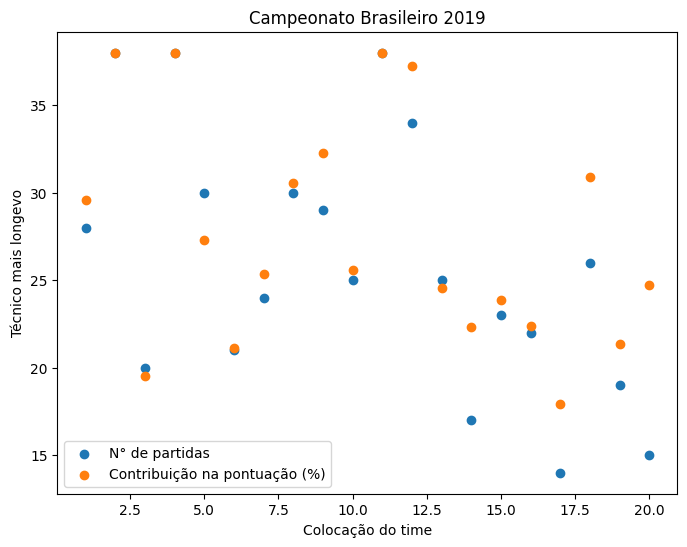

In [31]:
# conferindo o resultado no gráfico
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.title('Campeonato Brasileiro 2019')

plt.scatter(posicoes, n_partidas, label="N° de partidas")
plt.scatter(posicoes, pontos_tecnicos, label="Contribuição na pontuação (%)")
plt.xlabel('Colocação do time')
plt.ylabel('Técnico mais longevo')
plt.legend(loc="lower left")
plt.xscale('linear')

In [32]:
# conferindo o resultado na tabela
pontos_tecnicos = [round(pontos / 38 * 100, 2) for pontos in pontos_tecnicos]
tabela = zip(times, tecnicos_mais_longevos, n_partidas, pontos_tecnicos)
df_tabela = pd.DataFrame.from_records(tabela, columns=header, index=posicoes)
df_tabela

,Times,Técnico mais longevo,Nº de partidas,Contribuição na pontuação (%)
1,Flamengo,J. Pinheiro de Jesus,28,77.79
2,Santos,J. Sampaoli Moya,38,100.00
3,Palmeiras,L. Venker de Menezes,20,51.34
4,Grêmio,Renato Gaúcho,38,100.00
5,Athletico-PR,T. Retzalff Nunes,30,71.87
6,São Paulo,A. Stival,21,55.55
7,Internacional,O. Hellmann,24,66.66
8,Corinthians,F. Carille,30,80.37
9,Fortaleza,R. Ceni,29,84.89
10,Goiás,N. da Silveira Júnior,25,67.32
